## 0. Install and Import Dependencies

In [ ]:
!pip install easyocr

In [19]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np

## 1. Read in images or video

In [24]:
#IMAGE_PATH = 'img1.jpg'
IMAGE_PATH = 'img4.jpeg'

In [25]:
reader = easyocr.Reader(['en'])
result = reader.readtext(IMAGE_PATH)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[127, 117], [409, 117], [409, 161], [127, 161]],
  'ee You only live once,',
  0.7742546686576476),
 ([[163, 155], [415, 155], [415, 193], [163, 193]],
  'but if you do it right,',
  0.6012248618824705),
 ([[197, 187], [429, 187], [429, 229], [197, 229]],
  'once is enough: 1J',
  0.2335602205979547),
 ([[259, 229], [331, 229], [331, 245], [259, 245]],
  'Mae West',
  0.9941520544561673)]

## 2. Draw Results 

## single word handling 

In [22]:
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

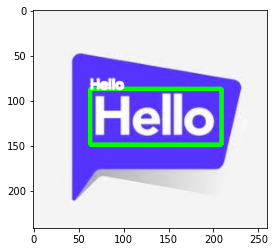

In [23]:
img = cv2.imread(IMAGE_PATH)
img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
img = cv2.putText(img,text,top_left, font, 0.5,(255,255,255),2,cv2.LINE_AA)
plt.imshow(img)
plt.show()

## 3. Handling Multiple Lines

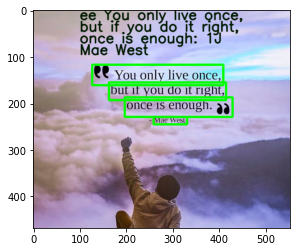

In [26]:
img = cv2.imread(IMAGE_PATH)
spacer = 20
for detection in result: 
    top_left = tuple(detection[0][0])
    bottom_right = tuple(detection[0][2])
    text = detection[1]
    img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
    img = cv2.putText(img,text,(100,spacer), font, 1,(0,25,0),2,cv2.LINE_AA)
    spacer+=25
    
plt.imshow(img)
plt.show()